# Problem Set 3: Image rotation
Peachyapa Saengcharoentrakul, April 27, INFO 371 | Ott Toomet/Zening Qiu

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.image as mpimg
import cv2

In [ ]:
num3 = imread('./number3.png')

In [ ]:
cz = pd.read_csv("../data/crazy-hat.tsv", sep="\t")
img = imread('../data/krazy-kat.png')
q1answerps03 = imread('../problem set/ps03_q1.1_peachs.png')

In [ ]:
X = cz[["x", "y"]].values
X[:5]

In [ ]:
groups = cz["group"].values
groups

In [8]:
M = cz[["x", "y"]].values
M[:5]

NameError: name 'cz' is not defined

## 1. Matrix multiplication (10pt)

### 1.1 (6pt) Multiply these matrices/vectors manually. Show the math you do while solving these. Note: you can do this on paper, just include a picture of your solution.


See attached image

In [9]:
answersq11 = mpimg.imread("../problem set/ps03_q1.1_peachs.png")
imgplot = plt.imshow(answersq11)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../problem set/ps03_q1.1_peachs.png'

### 1.2 (4pt) now check your results on computer

In [10]:
q1_1_a1 = [[0, 7], 
           [5, 3]]
q1_1_a2 = [[1, 0], 
           [0, -1]]
q1_1_aPrd = np.matmul(q1_1_a1, q1_1_a2)
q1_1_aPrd

array([[ 0, -7],
       [ 5, -3]])

In [11]:
q1_1_b1 = [[0, 7], 
           [5, 3]]
q1_1_b2 = [[1, 0], 
           [0, -1],
           [0, 1]]
q1_1_bPrd = np.matmul(q1_1_b1, q1_1_b2)
q1_1_bPrd

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [12]:
q1_1_c1 = [[0, 7], 
           [5, 3]]
q1_1_c2 = [[1, 0, 0], 
           [0, -1, 1]]
q1_1_cPrd = np.matmul(q1_1_c1, q1_1_c2)
q1_1_cPrd

array([[ 0, -7,  7],
       [ 5, -3,  3]])

Answers are the same

## 2. Linear transformation of images (60pt)

### 2.1 Flipping (mirroring) image (30pt)

#### 2.1.1 (10pt) Construct the “flip-x” matrix F . It should be a 2 × 2 matrix that inverses the x-components while leaving y-components intact. You can think in terms of generic matrix multiplication.

Hint: you can take the unit matrix as the point of departure and see which elements you have to modify to get flip-x instead.

In [13]:
# https://www.google.com/search?q=how+to+flip+matrix+2x2&tbm=isch&ved=2ahUKEwjFoIeawpvwAhWS-TgGHR
# ztBCEQ2-cCegQIABAA&oq=how+to+flip+matrix+2x2&gs_lcp=CgNpbWcQAzoECAAQGFDvmAFY2p0BYO-eAWgAcAB4AIA
# BRYgBjgKSAQE0mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=KH2GYMXsGJL
# z4-EPnNqTiAI&bih=637&biw=1440#imgrc=dWBWYMGOroFNDM

# def flipXMatrix(matrix): 
#     flipFactor = [[1, 0],
#                   [0, 1]]
#     return np.matmul(matrix, flipFactor)

def flipXMatrix(matrix): 
    flipFactor = [[-1, 0],
                  [0, 1]]
    return np.matmul(matrix, flipFactor)

In [14]:
def flip(matrix): 
    flipFactor = [[-1, 0],
                  [0, 1]]
    return flipFactor

#### 2.1.2 (10pt) Why should Fx be a 2 × 2 matrix? (Hint: try something else, e.g. 2 × 3 or 3 × 2 matrix. What is the result?)

So we don't run into dimension errors and flip it properly (since we only want to flip X and not Y, and we don't want to create more columns)

#### 2.1.3 (10pt) Demonstrate that your Fx flips Crazy Hat image. (Hint: you can re-use the plotting function from the lab with no modifications.)


In [15]:
X_flipXMatrix = flipXMatrix(X)

NameError: name 'X' is not defined

In [16]:
# uniqueGroups = np.unique(groups)

# for grp in uniqueGroups:
#     Xg = X_flipXMatrix[groups == grp]
#     ax = plt.subplot(1, 1, 1)
#     ax.plot(Xg[:,0], Xg[:,1], marker="o")
#     ax.set_aspect("equal")

def plotGraph(X, groups, colour):
    uniqueGroups = np.unique(groups)
    for grp in uniqueGroups:
        Xg = X[groups == grp]
        ax = plt.subplot(1, 1, 1)
        ax.plot(Xg[:,0], Xg[:,1], marker="o", color=colour)
        ax.set_aspect("equal")

In [17]:
# this is the flipped
plotGraph(X_flipXMatrix, groups, 'blue')

NameError: name 'X_flipXMatrix' is not defined

In [18]:
# this is the original; as you can see its flipped
plotGraph(X, groups, 'red')

NameError: name 'X' is not defined

### 2.2 Stretch image (30pt)

#### 2.2.1 (10pt) Create the “stretch-y” matrix Sy(s) where s is the “stretch factor”, 2 in the example above. Exactly as a above, it should be a 2 × 2 matrix that stretches the y-components while leaving x-components untouched. And you can think in terms of generic matrix multiplication:

In [19]:
def stretchYMatrix(matrix, factor):
    # stretches y
    stretchFactor = [[1, 0],
                     [0,factor]]
    
# stretches x
#     stretchFactor = [[factor, 0],
#                      [0,1]]

#  rotates
#     stretchFactor = [[0, 1],
#                      [factor,0]]

# rotates
#         stretchFactor = [[0, factor],
#                      [1,0]]
    return np.matmul(matrix, stretchFactor)

In [20]:
# same thing but cleaner and using @
def stretch(factor):
    # stretches y
    stretchFactor = [[1, 0],
                     [0,factor]]
    return stretchFactor

#### 2.2.2 (10pt) Demonstrate that your matrix works correctly by stretching Crazy Hat vertically by factor 2.

In [21]:
plotMe = X @ stretch(2)
plotGraph(plotMe, groups, 'red')
# plotGraph(stretchYMatrix(X, 2), groups, 'red')

NameError: name 'X' is not defined

#### 2.2.3 (10pt) Finally, let’s combine these transformation. Use Crazy Hat to perform the following oper- ations: mirror from the 45◦-line, and stretch it 2× along the 45◦-line (see the example below). (I have in mind the 45° line that heads into NE but you may define the degrees in the same way as we do for rotation if you wish.)
Hint: instead of creating a flip-45-deg matrix, you can rotate your image by 45 degrees, flip over x and rotate back as X · R(45) · Fx · R(−45). Try this!

In [22]:
# from ott's inc04a
def Rot(alpha):
    a = np.pi*alpha/180
    R = np.array([[np.cos(a), -np.sin(a)],
                 [np.sin(a), np.cos(a)]])
    return R

In [23]:
rotatedX = X @ Rot(45)
flippedRotatedX = flipXMatrix(rotatedX)
stretchedFlippedRotatedX = stretchYMatrix(flippedRotatedX, 2)
rotatedX_2 = stretchedFlippedRotatedX @ Rot(45)
plotGraph(rotatedX_2, groups, 'blue')

NameError: name 'X' is not defined

## Test if the code works with the PS example

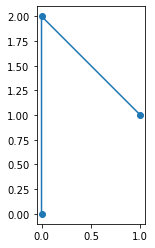

In [24]:
# create the image
A = np.array([[0,0], [0,2], [1,1]]) # plot the image
ax = plt.subplot(1,1,1) 
ax.plot(A[:,0], A[:,1], marker='o')
ax.set_aspect("equal")
plt.show()

In [25]:
def plotGraphTester(A, colour):
    ax = plt.subplot(1, 1, 1)
    ax.plot(A[:,0], A[:,1], marker="o", color=colour)
    ax.set_aspect("equal")

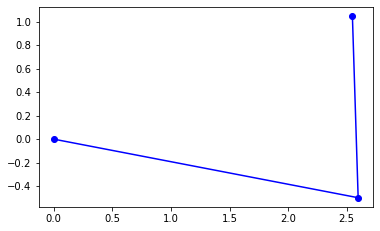

In [26]:
rotatedA = A @ Rot(-60)
flippedRotatedA = flipXMatrix(rotatedA)
stretchedFlippedRotatedA = stretchYMatrix(flippedRotatedA, 2)
rotatedA_2 = stretchedFlippedRotatedA @ Rot(60)

plotGraphTester(rotatedA_2, 'blue')

## 3. Rotate Bitmap Images (30 points)

### 3.1 (15pt) Run the code and understand what it does. In particular, what is the matrix X that is made by stacking?

In [27]:
import cv2

In [35]:
img = imread('./number3.png')[:, :, 0] # RGBA?

shape: (280, 280)


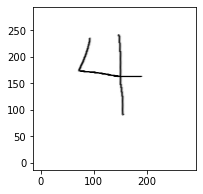

In [36]:
print("shape:", img.shape)
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(img.shape[1]),
np.arange(img.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=img.ravel(), marker='.', cmap="Greys_r") 
ax.set_aspect('equal')
plt.show()

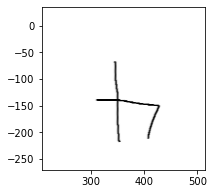

In [37]:
kkFigure = plt.figure(figsize=(3,3))
# rotatedA = X @ Rot(-180) + np.array([500, 23]) # + np.array([]) changes position but we'll need crop to shift

ax = kkFigure.add_subplot(1, 1, 1)
ax.scatter(rotatedA[:,0], rotatedA[:,1], c=img.ravel(), marker=".", cmap="Greys_r")
ax.set_aspect("equal")

In [ ]:
# The number of pixels
#num_rows, num_cols = img.shape[:2]

# Creating a translation matrix
#translation_matrix = np.float32([ [1,0,70], [0,1,110] ])

# Image translation
#img_translation = cv2.warpAffine(img, translation_matrix, (num_cols,num_rows))

#cv2.namedWindow('Translation', cv2.WINDOW_NORMAL)


In [ ]:
num3

shape: (280, 280)


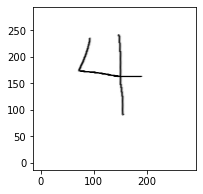

In [39]:
print("shape:", img.shape)
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(img.shape[1]),
np.arange(img.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=img.ravel(), marker='.', cmap="Greys_r") 
ax.set_aspect('equal')
plt.show()

Stacks of 2D matrices of gray values that forms a greyscale image

### 3.2 Consult lecture notes section 2.3.5, in particular the section about bitmap images.

### 3.3 (10pt) Now use matrix multiplication to rotate this image into a few different angles. Note: use matrix rotation we did above, various image libraries will not count!
Suggestion: when you use the code like shown above, it will result in large and slow pdf (or html) files. You can make the pdf file better by:
(a) instead of plt.show, save the image into a jpg or png file. (b) put the resulting saved file into your pdf/html.


#### Random Rotations

In [40]:
img.shape

(280, 280)

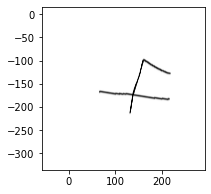

In [41]:
kkFigure = plt.figure(figsize=(3,3))
rotatedA = X @ Rot(99)
ax = kkFigure.add_subplot(1, 1, 1)
ax.scatter(rotatedA[:,0], rotatedA[:,1], c=img.ravel(), marker=".", cmap="Greys_r")
ax.set_aspect("equal")

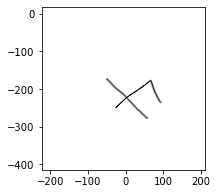

In [42]:
kkFigure = plt.figure(figsize=(3,3))
rotatedA = X @ Rot(137)
ax = kkFigure.add_subplot(1, 1, 1)
ax.scatter(rotatedA[:,0], rotatedA[:,1], c=img.ravel(), marker=".", cmap="Greys_r")
ax.set_aspect("equal")

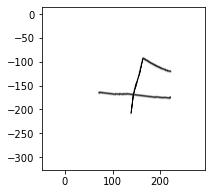

In [43]:
kkFigure = plt.figure(figsize=(3,3))
rotatedA = X @ Rot(817)
ax = kkFigure.add_subplot(1, 1, 1)
ax.scatter(rotatedA[:,0], rotatedA[:,1], c=img.ravel(), marker=".", cmap="Greys_r")
ax.set_aspect("equal")

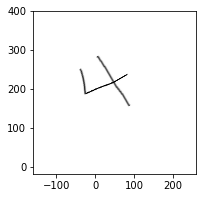

In [44]:
kkFigure = plt.figure(figsize=(3,3))
rotatedA = X @ Rot(-30)
ax = kkFigure.add_subplot(1, 1, 1)
ax.scatter(rotatedA[:,0], rotatedA[:,1], c=img.ravel(), marker=".", cmap="Greys_r")
ax.set_aspect("equal")

#### Save this

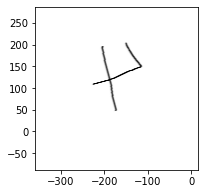

In [45]:
kkFigure = plt.figure(figsize=(3,3))
rotatedA = X @ Rot(10)
flippedRotatedA = flipXMatrix(rotatedA)
rotatedA_2 = flippedRotatedA @ Rot(-5)
# saveKK = plotGraphBeep(rotatedA_2)
ax = kkFigure.add_subplot(1, 1, 1)
ax.scatter(rotatedA_2[:,0], rotatedA_2[:,1], c=img.ravel(), marker=".", cmap="Greys_r")
ax.set_aspect("equal")
kkFigure.savefig('kk-rotated.png')

#### read image

In [46]:
rotatedKK = mpimg.imread("../problem set/kk-rotated.png")
imgplot = plt.imshow(rotatedKK)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../problem set/kk-rotated.png'

### 3.4 (5pt) Use also other transforms (Fx and Sy) to manipulate the image.

We do flipping and rotating here

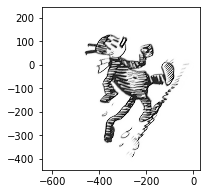

In [41]:
kkFigure = plt.figure(figsize=(3,3))
rotatedA = X @ Rot(30)
flippedRotatedA = flipXMatrix(rotatedA)
rotatedA_2 = flippedRotatedA @ Rot(-30)
# saveKK = plotGraphBeep(rotatedA_2)
ax = kkFigure.add_subplot(1, 1, 1)
ax.scatter(rotatedA_2[:,0], rotatedA_2[:,1], c=img.ravel(), marker=".", cmap="Greys_r")
ax.set_aspect("equal")

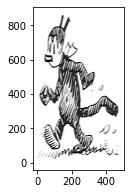

In [42]:
kkFigure = plt.figure(figsize=(3,3))
stretchedKK = X @ stretch(2)
# saveKK = plotGraphBeep(rotatedA_2)
ax = kkFigure.add_subplot(1, 1, 1)
ax.scatter(stretchedKK[:,0], stretchedKK[:,1], c=img.ravel(), marker=".", cmap="Greys_r")
ax.set_aspect("equal")

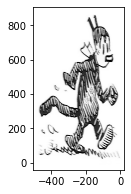

In [43]:
kkFigure = plt.figure(figsize=(3,3))
stretchedKK = X @ stretch(2)
flippedStretchedKK = flipXMatrix(stretchedKK)
# saveKK = plotGraphBeep(rotatedA_2)
ax = kkFigure.add_subplot(1, 1, 1)
ax.scatter(flippedStretchedKK[:,0], flippedStretchedKK[:,1], c=img.ravel(), marker=".", cmap="Greys_r")
ax.set_aspect("equal")